In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import torch
from torchvision import transforms
import pickle

from util.usps_data import draw_random_usps_samples
from core.DataEmbeddingGraph import DataEmbeddingGraph
from util.plot_embedding import plot_embedding, plot_embedding_subplot

In [3]:
data_dir = '/Users/signapoop/Desktop/data/usps.h5'
# inputs, labels = draw_random_usps_samples(data_dir, n_samples=500)

In [4]:
num_datasets = 100
all_test_data = []
for i in range(num_datasets):
    num_samples = np.random.randint(200, 500)
    inputs, labels = draw_random_usps_samples(data_dir, n_samples=num_samples, train=False)

    # Package into graph block
    G = DataEmbeddingGraph(inputs, labels, 'spectral')
    all_test_data.append(G)

In [5]:
with open('usps_test_spectral.pkl', 'wb') as f:
    pickle.dump([all_test_data], f)

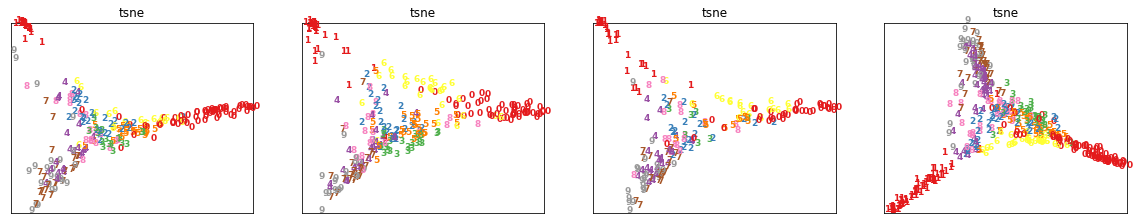

In [6]:
f, axarr = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3.5))

for i in range(4):
    G = all_test_data[i]
    int_labels = [int(l) for l in G.labels]
    plot_embedding_subplot(axarr[i], G.target, labels=int_labels, title='tsne')